In [19]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

import os

# Read in the data
df = pd.read_csv(r'C:\Users\u164590\Downloads\python_portfolio_project\movies.csv')


In [20]:
#Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
#See if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [22]:
#data types for the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
df = df.dropna()
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [24]:
#create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [25]:
df = df.sort_values(by=['gross'],inplace = False, ascending = False)


In [26]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


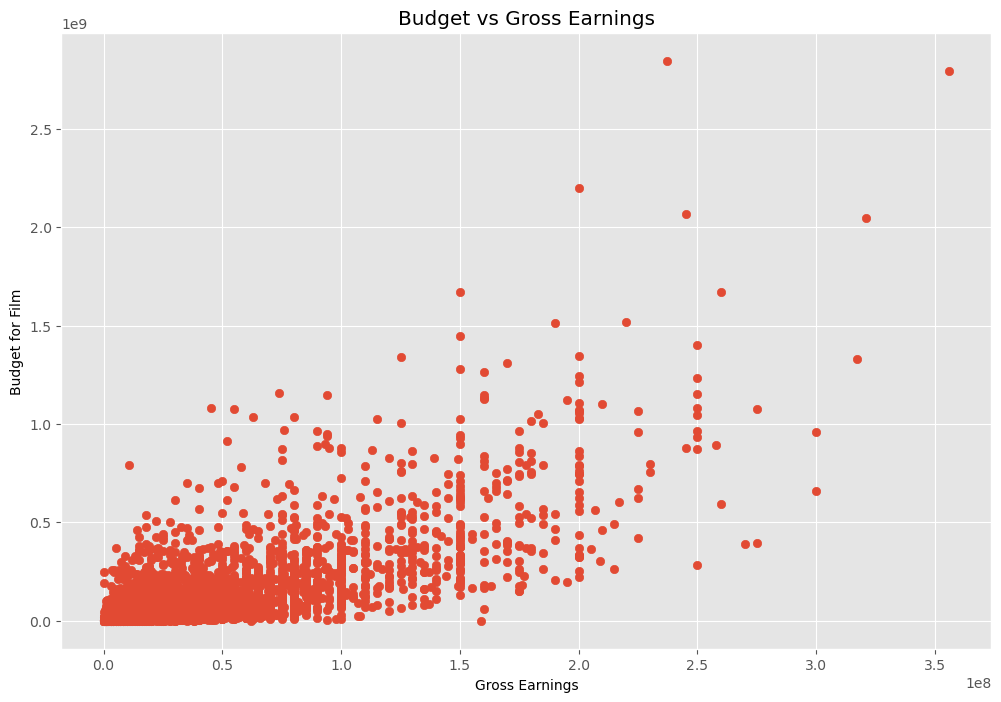

In [27]:
#Scatter plot with budget vs gross 

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

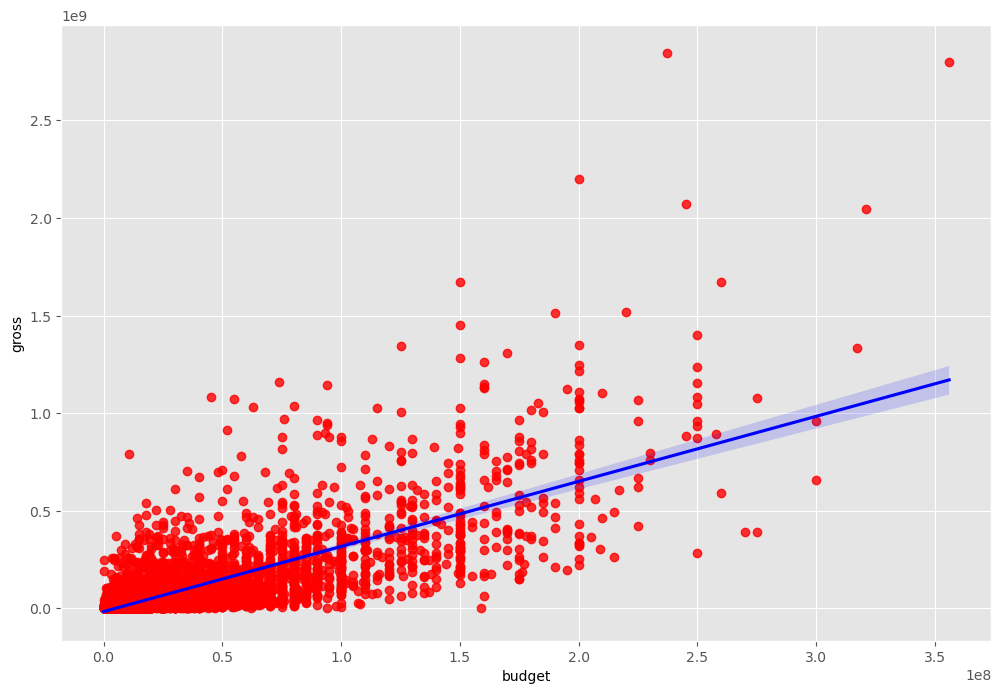

In [28]:
# Plot budget vs gross using seaborn

sns.regplot(x= 'budget', y = 'gross', data = df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [29]:
#Correlation

df.corr()

C:\Users\u164590\AppData\Local\Temp\ipykernel_17524\524132939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


C:\Users\u164590\AppData\Local\Temp\ipykernel_17524\1743041596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

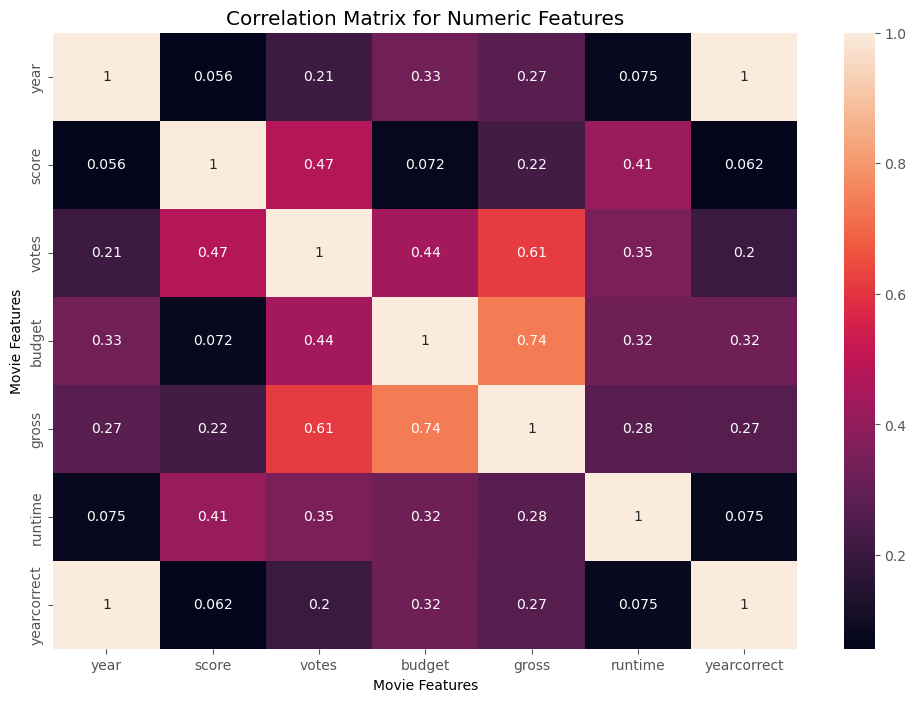

In [30]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [31]:
#Factorize 

df_factorized = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
for col_name in df_factorized.columns:
    if (df_factorized[col_name].dtype == 'object'):
        df_factorized[col_name] = df_factorized[col_name].astype('category')
        df_factorized[col_name] = df_factorized[col_name].cat.codes

df_factorized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


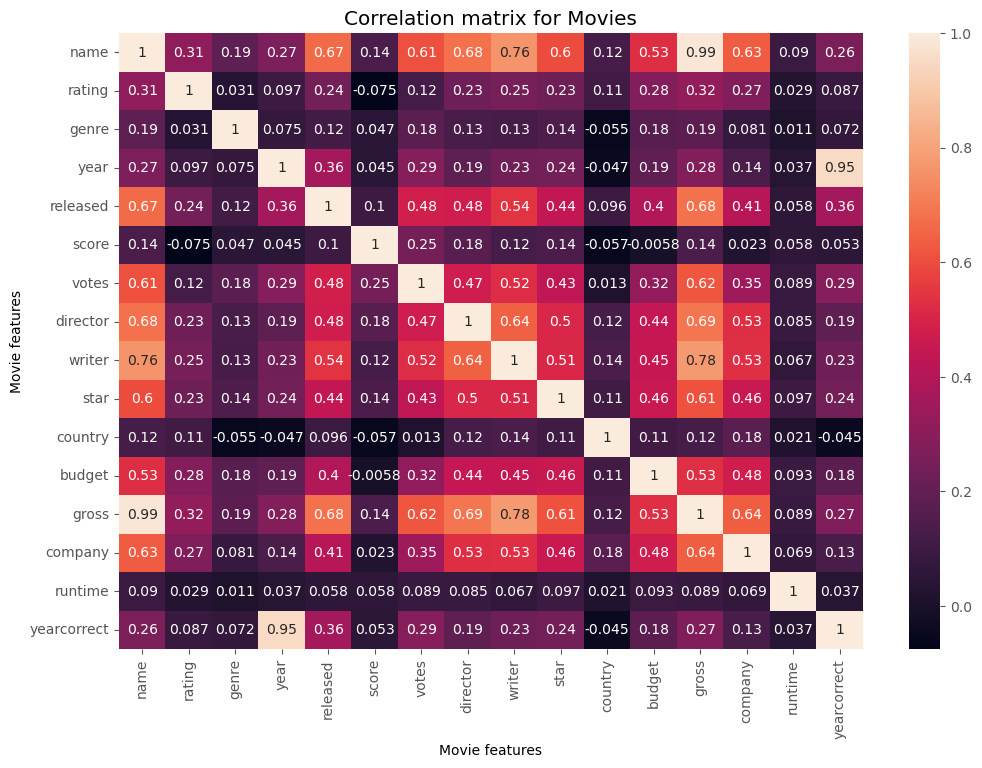

In [32]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [33]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667785
                              ...   
yearcorrect  budget         0.183598
             gross          0.272536
             company        0.134709
             runtime        0.036785
             yearcorrect    1.000000
Length: 256, dtype: float64


In [34]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [35]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 62, dtype: float64


In [36]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64